# Cleaning

In [1]:
# Data Manipulation
import pandas as pd

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# Statistics

import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# Classification & Regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.metrics 
import networkx as nx
from sklearn.decomposition import PCA



sns.set_theme(style='darkgrid', palette='dark')

In [2]:
df = pd.read_csv("final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1052 non-null   int64  
 1   Country      1052 non-null   object 
 2   Player       1052 non-null   object 
 3   Team         1052 non-null   object 
 4   Base price   1052 non-null   float64
 5   Winning bid  1052 non-null   object 
 6   Year         1052 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 57.7+ KB


In [3]:
df.nunique()

Unnamed: 0     1052
Country          29
Player          593
Team             17
Base price       15
Winning bid     128
Year             11
dtype: int64

In [4]:
df.head()

,Unnamed: 0,Country,Player,Team,Base price,Winning bid,Year
0,0,Guyana,Christopher Barnwell,Royal Challengers Bangalore,30.5,30.5,2013
1,1,South Africa,Johan Botha,Delhi Daredevils,183.0,274.5,2013
2,2,Australia,Daniel Christian,Royal Challengers Bangalore,61.0,61.0,2013
3,3,Australia,Michael Clarke,Pune Warriors India,244.0,244.0,2013
4,4,Australia,Nathan Coulter-Nile,Mumbai Indians,61.0,274.5,2013


In [5]:
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)

In [6]:
df['Winning bid'] = df['Winning bid'].str.extract(r'(\d+\.?\d*)').astype(float) # Strip nonumeric

In [7]:
df['Country'] = df['Country'].str.extract(r'^\s*(.*?)\s*$') # Strip whitespaces

In [8]:
for row in df.index:
    if df.loc[row, 'Team'] == 'Delhi Dardevils':
        df.loc[row, 'Team'] = 'Delhi Daredevils'
    if df.loc[row, 'Team'] == 'Delhi Daredevils':
        df.loc[row, 'Team'] = 'Delhi Capitals'
    if df.loc[row, 'Team'] == 'Rising Pune Supergiants':
        df.loc[row, 'Team'] = 'Rising Pune Supergiant'
    if df.loc[row, 'Team'] == 'Rising Pune Supergiant':
        df.loc[row, 'Team'] = 'Lucknow Super Giants'
    if df.loc[row, 'Team'] == 'Kings XI Punjab':
        df.loc[row, 'Team'] = 'Punjab Kings'

In [9]:
df['Change'] = df['Winning bid'] - df['Base price']
df['Rel Change'] = df['Change'] / df['Base price']
df[df['Change'] < 0]

,Country,Player,Team,Base price,Winning bid,Year,Change,Rel Change
41,India,Yuvraj Singh,Royal Challengers Bangalore,200.0,1.0,2014,-199.0,-0.995000
47,India,Dinesh Karthik,Delhi Capitals,200.0,1.0,2014,-199.0,-0.995000
970,England,Harry Brook,Sunrisers Hyderabad,150.0,1.0,2023,-149.0,-0.993333
973,England,Sam Curran,Punjab Kings,200.0,1.0,2023,-199.0,-0.995000
977,Australia,Cameron Green,Mumbai Indians,200.0,1.0,2023,-199.0,-0.995000
978,England,Ben Stokes,Chennai Super Kings,200.0,1.0,2023,-199.0,-0.995000
979,West Indies,Nicholas Pooran,Lucknow Super Giants,200.0,1.0,2023,-199.0,-0.995000


In [10]:
for row in df.index:
    if df.loc[row, 'Country'] in {"Namibia", 'Trinidad and Tobago', 'Jamaica', 'Barbados', 'Guyana'}:
        df.loc[row, 'Country'] = 'West Indies'

In [11]:
df[df['Player'].isin((lambda v: v[v > 1].index)(df.groupby('Player')['Country'].nunique()))].sort_values(['Player'])

,Country,Player,Team,Base price,Winning bid,Year,Change,Rel Change
240,South Africa,David Wiese,Royal Challengers Bangalore,30.0,280.0,2015,250.0,8.333333
1023,West Indies,David Wiese,Kolkata Knight Riders,100.0,100.0,2023,0.0,0.000000
484,West Indies,Jofra Archer,Rajasthan Royals,40.0,720.0,2018,680.0,17.000000
876,England,Jofra Archer,Mumbai Indians,200.0,800.0,2022,600.0,3.000000


In [12]:
df = df[~df['Player'].isin((lambda v: v[v > 1].index)(df.groupby('Player')['Country'].nunique()))].sort_values(['Player'])

In [13]:
df = df.drop_duplicates()

In [14]:
df = df[df['Change'] >= 0] #yall are sneaky fucks
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 53 to 530
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1038 non-null   object 
 1   Player       1038 non-null   object 
 2   Team         1038 non-null   object 
 3   Base price   1038 non-null   float64
 4   Winning bid  1038 non-null   float64
 5   Year         1038 non-null   int64  
 6   Change       1038 non-null   float64
 7   Rel Change   1038 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 73.0+ KB


In [15]:
df.nunique()

Country         15
Player         589
Team            12
Base price      15
Winning bid    121
Year            11
Change         138
Rel Change     161
dtype: int64

In [16]:
df.describe()

,Base price,Winning bid,Year,Change,Rel Change
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,64.215029,199.768642,2018.284200,135.553613,2.697463
std,62.567094,268.754084,3.139195,237.862211,5.825618
min,10.000000,10.000000,2013.000000,0.000000,0.000000
25%,20.000000,20.000000,2016.000000,0.000000,0.000000
50%,30.000000,80.000000,2018.000000,2.500000,0.033333
75%,100.000000,260.000000,2022.000000,180.000000,2.666667
max,244.000000,1625.000000,2023.000000,1550.000000,49.000000


# Univariate Analysis

In [17]:
df['Country'].value_counts()

Country
India                   665
Australia               116
England                  53
West Indies              53
South Africa             53
New Zealand              47
Sri Lanka                21
Afghanistan              11
Bangladesh                9
Saint Lucia               4
Zimbabwe                  2
United Arab Emirates      1
Ireland                   1
Netherlands               1
Nepal                     1
Name: count, dtype: int64

<Axes: xlabel='Country'>

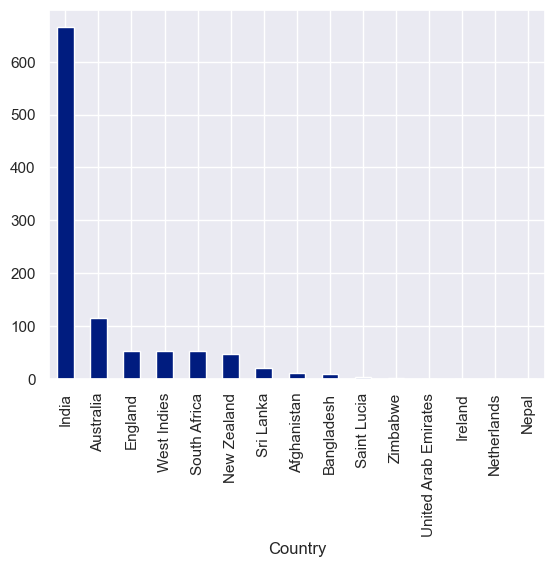

In [18]:
df['Country'].value_counts().plot(kind="bar")

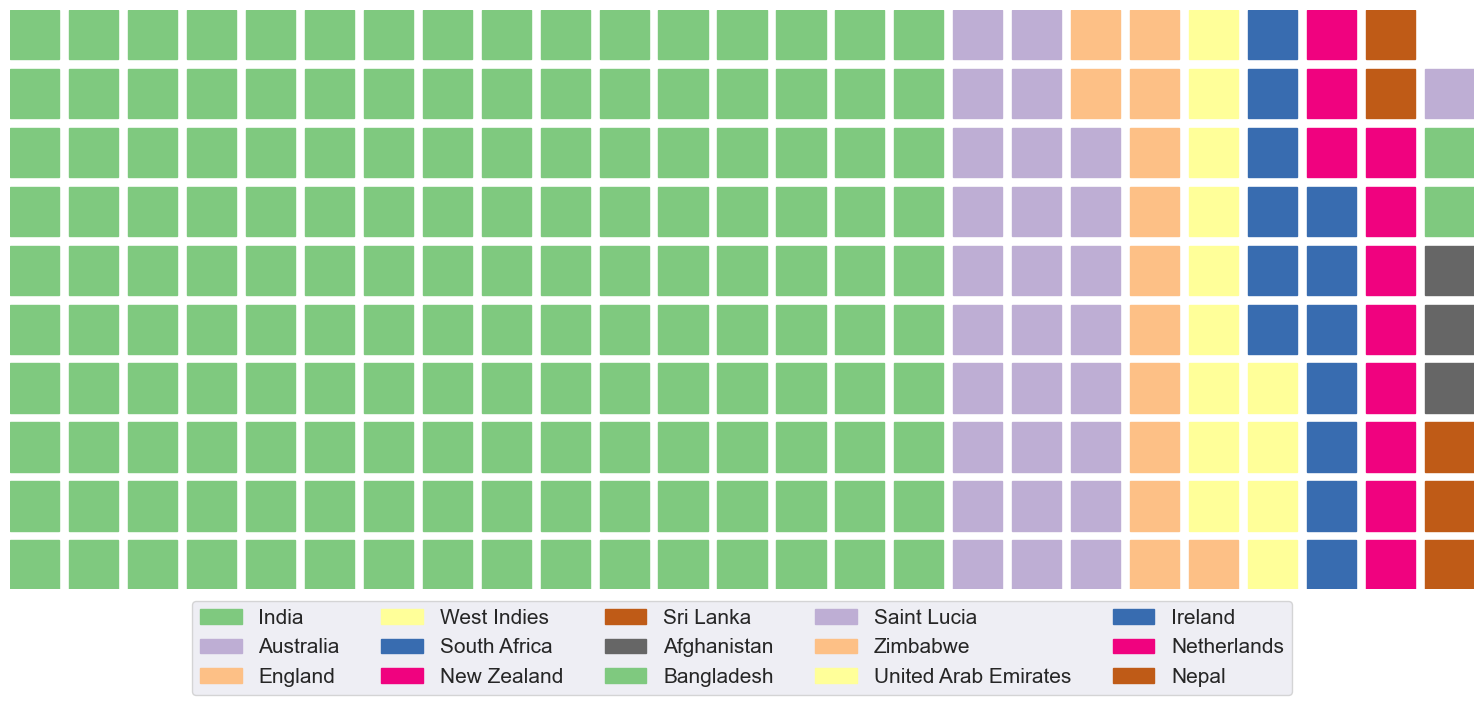

In [19]:
(lambda v: plt.figure(
    FigureClass=Waffle,
    rows = 10,
    columns = 25,
    values=v.values,
    labels=list(v.index),
    legend={     
        'bbox_to_anchor': (0.5, -0.1),               
        'fontsize': 10,
        'ncol': 5,
        'loc': 'lower center',
        'bbox_to_anchor': (0.5, -.2),
        'fontsize': 15

    },
    figsize=(15, 15),
    cmap_name = 'Accent'
))(df['Country'].value_counts())

plt.show()

In [20]:
df['Player'].value_counts()

Player
Jaydev Unadkat         10
Nathan Coulter-Nile     7
Amit Mishra             6
Mohit Sharma            6
Aaron Finch             5
                       ..
Vaibhav Rawal           1
Utkarsh Singh           1
Urvil Patel             1
Upendra Yadav           1
Unmukt Chand            1
Name: count, Length: 589, dtype: int64

In [21]:
df['Player'].value_counts().describe()

count    589.000000
mean       1.762309
std        1.107122
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: count, dtype: float64

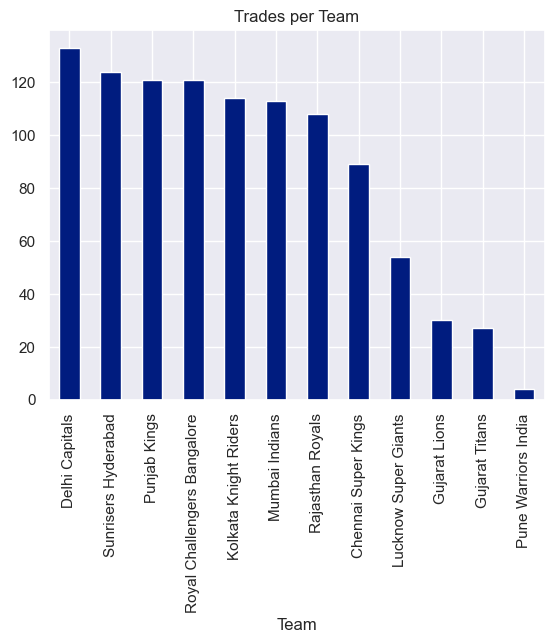

In [22]:
df['Team'].value_counts().plot(kind="bar")
plt.title("Trades per Team")
plt.show()

In [23]:
df['Base price'].describe()

count    1038.000000
mean       64.215029
std        62.567094
min        10.000000
25%        20.000000
50%        30.000000
75%       100.000000
max       244.000000
Name: Base price, dtype: float64

In [24]:
df['Winning bid'].describe()

count    1038.000000
mean      199.768642
std       268.754084
min        10.000000
25%        20.000000
50%        80.000000
75%       260.000000
max      1625.000000
Name: Winning bid, dtype: float64

In [25]:
df['Change'].describe()

count    1038.000000
mean      135.553613
std       237.862211
min         0.000000
25%         0.000000
50%         2.500000
75%       180.000000
max      1550.000000
Name: Change, dtype: float64

# Multivariate Analysis

## Secondary Tables

In [26]:
player_df = df.groupby('Player').agg(
    Num_of_Teams=('Team', 'nunique'),
    Base_Price_High=('Base price', 'max'),
    Base_Price_Low=('Base price', 'min'),
    Winning_Bid_High = ('Winning bid', 'max'),
    Winning_Bid_Mean = ('Winning bid', 'mean'),
    Winning_Bid_Low = ('Winning bid', 'max'),
    Largest_Delta = ('Change', 'max'),
    Smallest_Delta = ('Change', 'min'),
    Mean_Delta = ('Change', 'mean'),
    Country = ('Country', 'first'),
    Year_Range = ('Year', lambda s: s.max() - s.min())
).reset_index()
player_df.nunique()

Player              589
Num_of_Teams          6
Base_Price_High      15
Base_Price_Low       15
Winning_Bid_High    114
Winning_Bid_Mean    215
Winning_Bid_Low     114
Largest_Delta       128
Smallest_Delta       71
Mean_Delta          190
Country              15
Year_Range           11
dtype: int64

In [27]:
team_df = df.groupby('Team').agg(
    Num_of_Players = ('Player', 'nunique'),
    Winning_Bid_High = ('Winning bid', 'max'),
    Winning_Bid_Mean = ('Winning bid', 'mean'),
    Winning_Bid_Low = ('Winning bid', 'min'),
    Largest_Delta = ('Change', 'max'),
    Mean_Delta = ('Change', 'mean'),
    # Smallest_Delta = ('Change', 'min') #FIXME: giving NANs
).reset_index()
team_df.nunique()

Team                12
Num_of_Players      11
Winning_Bid_High    11
Winning_Bid_Mean    12
Winning_Bid_Low      3
Largest_Delta       11
Mean_Delta          12
dtype: int64

In [28]:
yearly_df = df.groupby("Year").agg(
    Num_of_Auctioned_Players = ('Player', 'nunique'),
    Num_of_Bidding_Teams = ('Team', 'nunique'),
    Winning_High = ('Winning bid', 'max'),
    Winning_Mean = ('Winning bid', 'mean'),
    Winning_Low = ('Winning bid', 'min'),
    Base_High = ('Base price', 'max'),
    Base_Low = ('Base price', 'min'),
    Delta_High = ('Change', 'max'),
    Delta_Mean = ('Change', 'mean'),
    Total_Traded_Volume = ('Winning bid', 'sum'),
).reset_index()

yearly_df.nunique()

Year                        11
Num_of_Auctioned_Players    11
Num_of_Bidding_Teams         3
Winning_High                11
Winning_Mean                11
Winning_Low                  3
Base_High                    2
Base_Low                     3
Delta_High                  10
Delta_Mean                  11
Total_Traded_Volume         11
dtype: int64

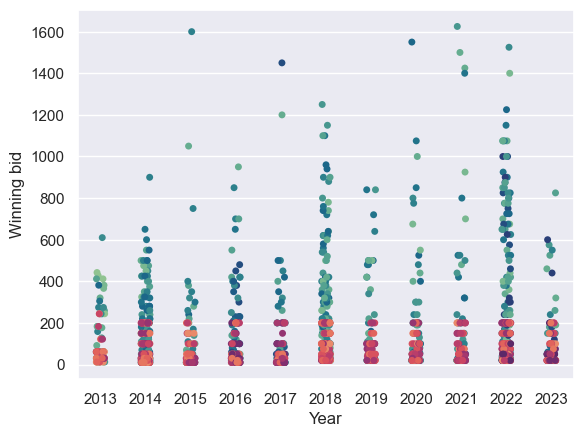

In [29]:
sns.stripplot(x="Year", y="Winning bid", jitter=True, data=df, hue="Team", palette="crest")
sns.stripplot(x="Year", y="Base price", jitter=True, data=df, hue="Team", palette="flare")
plt.gca().get_legend().remove()

Text(0, 0.5, 'Max Increase in Bid Price')

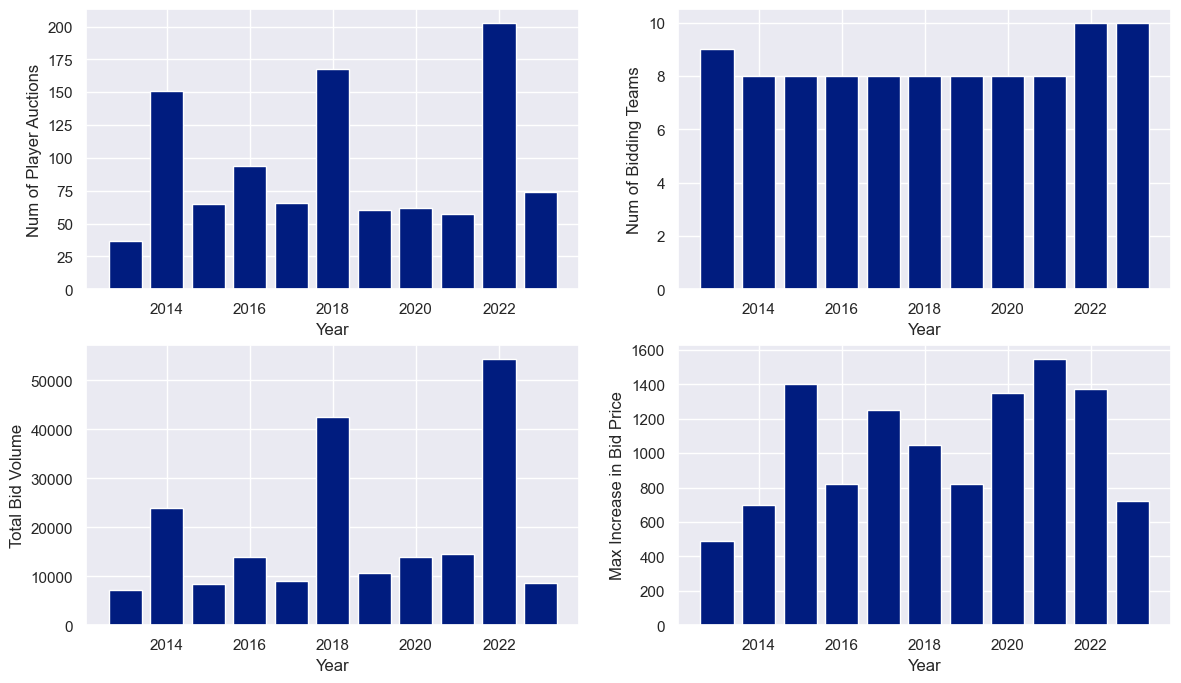

In [30]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.bar(yearly_df['Year'], yearly_df['Num_of_Auctioned_Players'])
plt.xlabel('Year')
plt.ylabel('Num of Player Auctions')

plt.subplot(2, 2, 2)
plt.bar(yearly_df['Year'], yearly_df['Num_of_Bidding_Teams'])
plt.xlabel('Year')
plt.ylabel('Num of Bidding Teams')

plt.subplot(2, 2, 3)
plt.bar(yearly_df['Year'], yearly_df['Total_Traded_Volume'])
plt.xlabel('Year')
plt.ylabel('Total Bid Volume')

plt.subplot(2, 2, 4)
plt.bar(yearly_df['Year'], yearly_df['Delta_High'])
plt.xlabel('Year')
plt.ylabel('Max Increase in Bid Price')

### Table Statistics

In [31]:
player_df.describe()

,Num_of_Teams,Base_Price_High,Base_Price_Low,Winning_Bid_High,Winning_Bid_Mean,Winning_Bid_Low,Largest_Delta,Smallest_Delta,Mean_Delta,Year_Range
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.00000
mean,1.592530,67.404414,45.835654,233.089643,159.569941,233.089643,170.562988,49.412903,103.377587,1.86927
std,0.914925,66.583839,50.501098,313.068321,196.718989,313.068321,279.204603,127.228411,169.085454,2.69824
min,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,30.000000,20.000000,85.000000,75.000000,85.000000,20.000000,0.000000,11.666667,0.00000
75%,2.000000,100.000000,50.000000,320.000000,229.812500,320.000000,250.000000,25.000000,150.000000,4.00000
max,6.000000,244.000000,244.000000,1625.000000,1350.000000,1625.000000,1550.000000,1050.000000,1150.000000,10.00000


In [32]:
team_df.describe()

,Num_of_Players,Winning_Bid_High,Winning_Bid_Mean,Winning_Bid_Low,Largest_Delta,Mean_Delta
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,78.166667,1249.354167,208.672037,30.333333,1121.812500,142.451291
std,39.514861,430.243595,69.568098,67.348933,385.053555,56.958546
min,4.000000,400.000000,82.333333,10.000000,390.000000,42.333333
25%,47.000000,1075.000000,186.248931,10.000000,965.000000,118.969371
50%,98.000000,1425.000000,198.556657,10.000000,1250.000000,135.704839
75%,108.750000,1531.250000,225.794318,10.000000,1381.250000,155.891387
max,119.000000,1625.000000,381.250000,244.000000,1550.000000,282.125000


In [33]:
yearly_df.describe()

,Year,Num_of_Auctioned_Players,Num_of_Bidding_Teams,Winning_High,Winning_Mean,Winning_Low,Base_High,Base_Low,Delta_High,Delta_Mean,Total_Traded_Volume
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2018.000000,94.272727,8.454545,1193.181818,187.756456,15.654545,204.000000,15.654545,1048.000000,127.192125,18850.895455
std,3.316625,54.247748,0.820200,374.708371,55.097970,5.031176,13.266499,5.031176,354.661811,45.350394,15575.692027
min,2013.000000,37.000000,8.000000,610.000000,115.270270,10.000000,200.000000,10.000000,488.000000,62.162162,7249.850000
25%,2015.500000,61.000000,8.000000,870.000000,143.361541,10.000000,200.000000,10.000000,772.500000,90.729665,8822.500000
50%,2018.000000,66.000000,8.000000,1250.000000,178.000000,20.000000,200.000000,20.000000,1050.000000,123.583333,13970.000000
75%,2020.500000,122.500000,8.500000,1537.500000,239.484447,20.000000,200.000000,20.000000,1362.500000,165.533794,19220.000000
max,2023.000000,203.000000,10.000000,1625.000000,268.201970,20.000000,244.000000,20.000000,1550.000000,194.507389,54445.000000


## Correlation Analysis

In [34]:
corr_player = player_df.select_dtypes(include="number").corr()
corr_team = team_df.select_dtypes(include="number").corr()
corr_yearly = yearly_df.select_dtypes(include="number").corr()

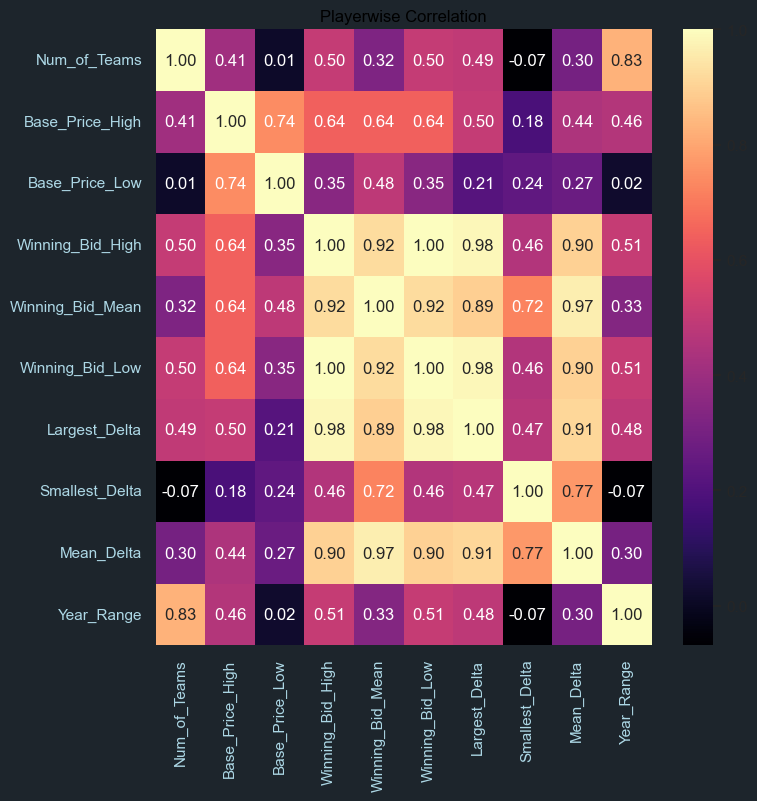

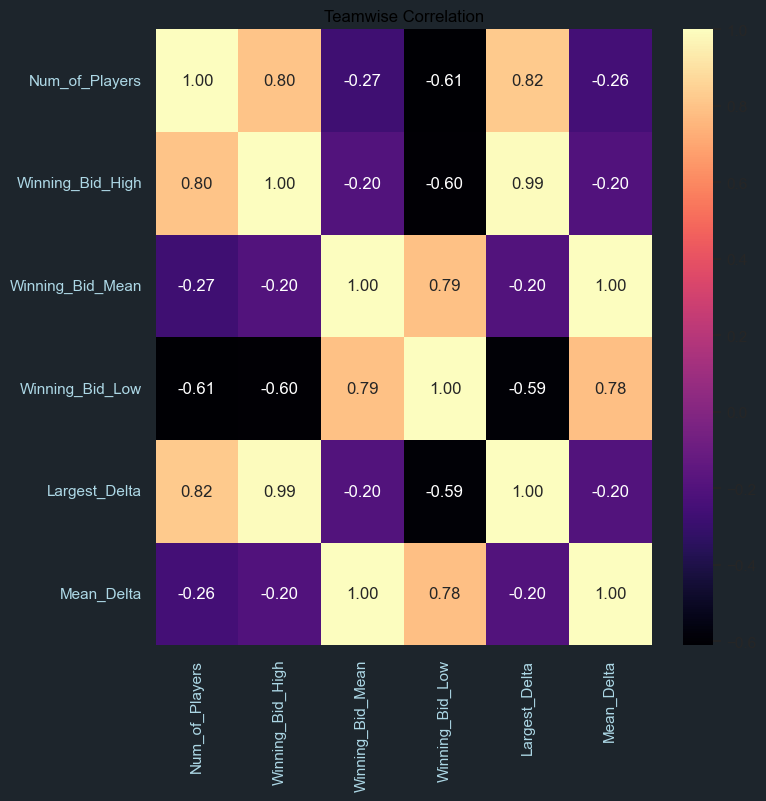

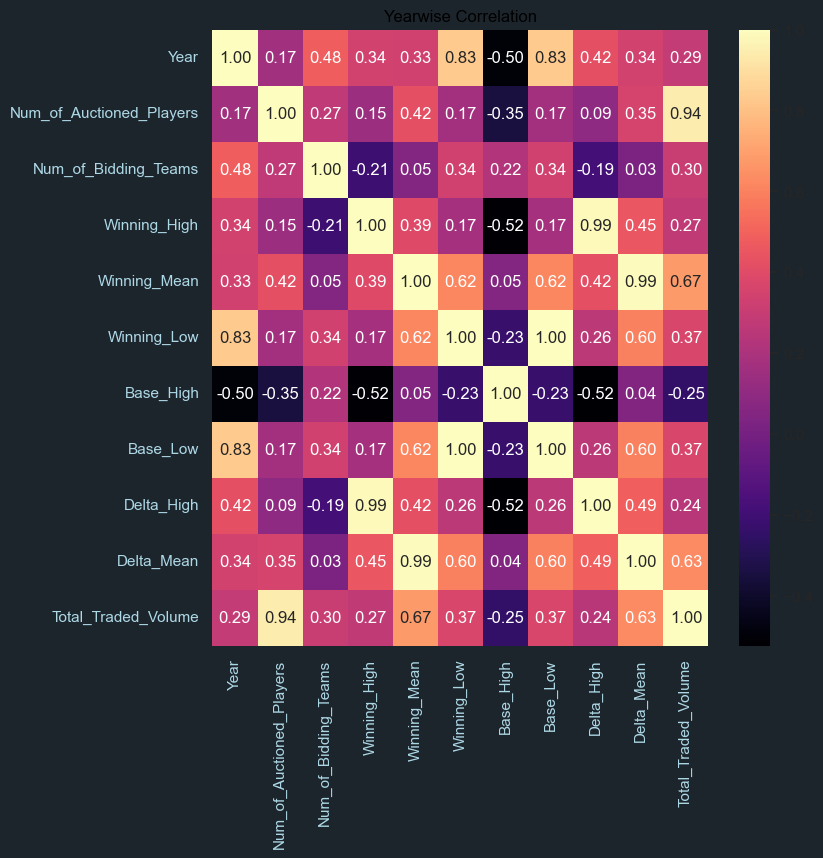

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_player, annot=True, cmap='magma', fmt='.2f')
plt.gcf().set_facecolor('#1d252c')

plt.title('Playerwise Correlation', color='black')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

plt.figure(figsize=(8,8))
sns.heatmap(corr_team, annot=True, cmap='magma', fmt='.2f')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)
plt.gcf().set_facecolor('#1d252c')

plt.title('Teamwise Correlation', color='black')

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

plt.figure(figsize=(8,8))
sns.heatmap(corr_yearly, annot=True, cmap='magma', fmt='.2f')
#plt.yticks(rotation=45)
#plt.xticks(rotation=45)
plt.gcf().set_facecolor('#1d252c')

plt.title('Yearwise Correlation', color='black')

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), color='lightblue')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), color='lightblue')

plt.show()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\2636333074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare")
C:\Users\arham\AppData\Local\Temp\ipykernel_28088\2636333074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
C:\Users\arham\AppData\Local\Temp\ipykernel_28088\2636333074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Change", data=df, palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_28088\26

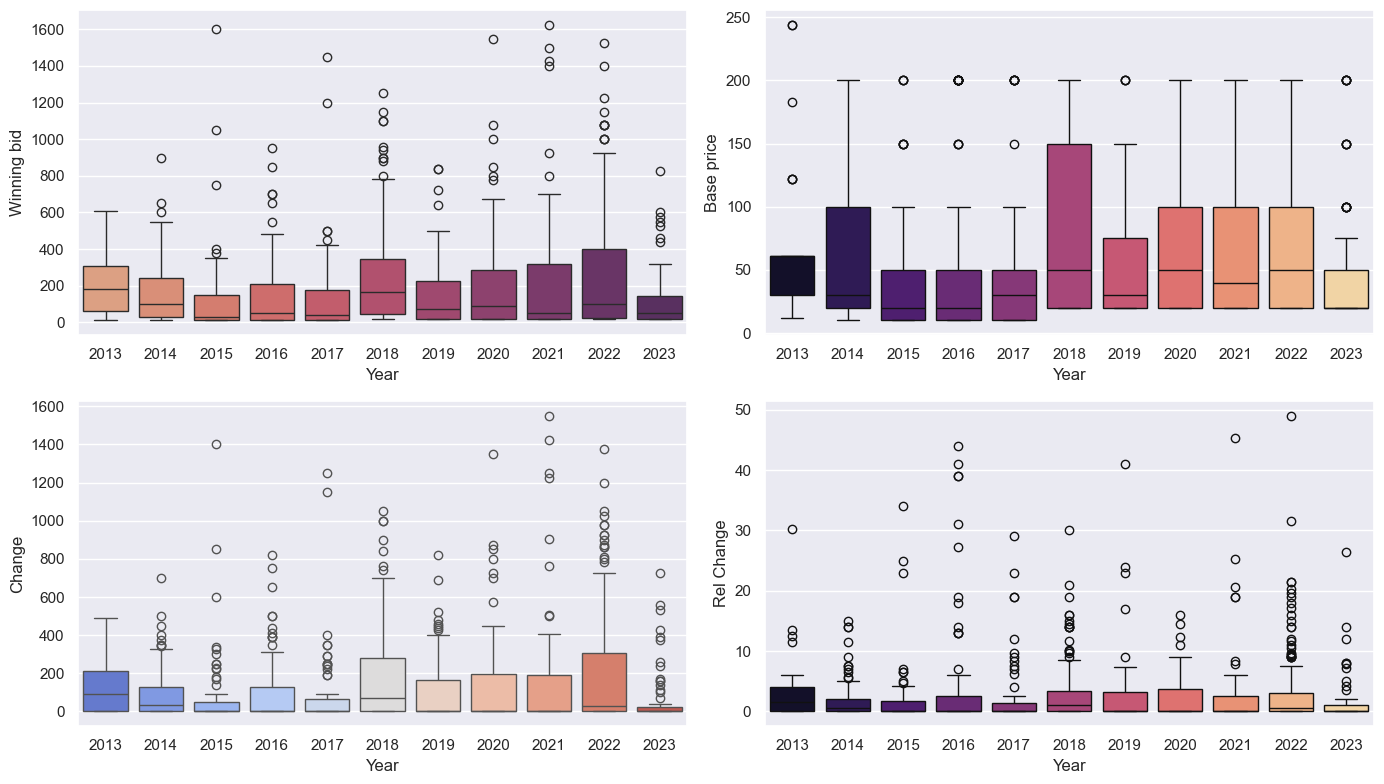

In [36]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare")
plt.tight_layout()
plt.subplot(2,2,2)
sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
plt.tight_layout()
plt.subplot(2,2,3)
sns.boxplot(x="Year", y="Change", data=df, palette="coolwarm")
plt.tight_layout()
plt.subplot(2, 2, 4)
sns.boxplot(x="Year", y="Rel Change", data=df, palette="magma")

plt.show()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\1871087307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare", showfliers=False)


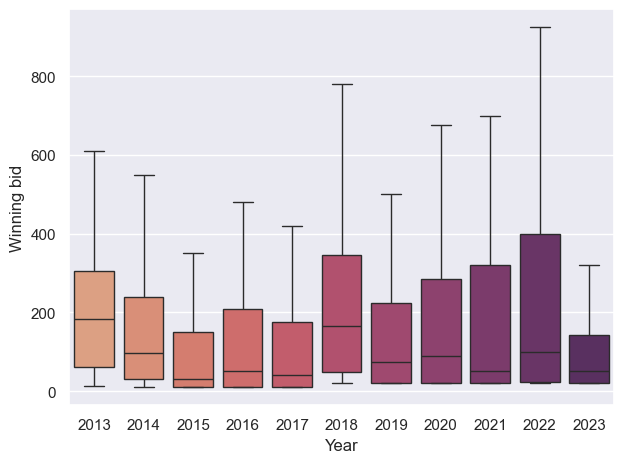

In [37]:
sns.boxplot(x="Year", y="Winning bid", data=df, palette="flare", showfliers=False)
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\2698546265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Base price", data=df, palette="magma")


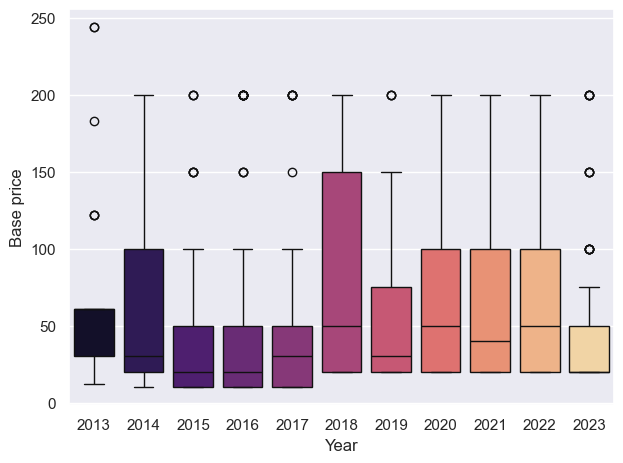

In [38]:
sns.boxplot(x="Year", y="Base price", data=df, palette="magma")
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\3814944418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Change", data=df, palette="rocket", showfliers=False)


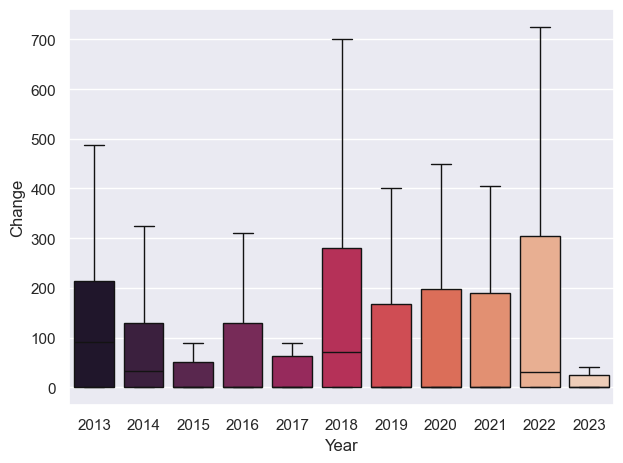

In [39]:
sns.boxplot(x="Year", y="Change", data=df, palette="rocket", showfliers=False)
plt.tight_layout()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\1090703969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Rel Change", data=df, palette="rocket", showfliers=False)


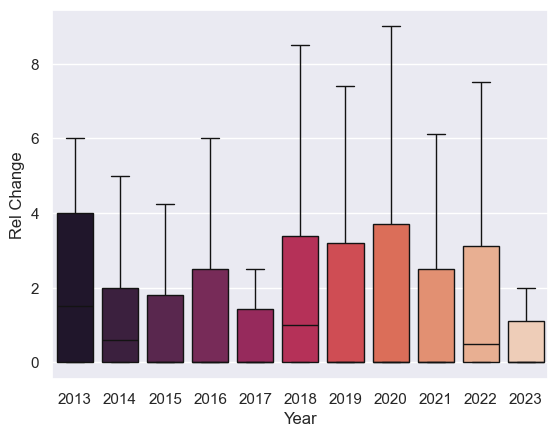

In [40]:
sns.boxplot(x="Year", y="Rel Change", data=df, palette="rocket", showfliers=False)
plt.show()

In [41]:
kruskal(*[group['Winning bid'].values for _, group in df.groupby('Country')])[0]

np.float64(141.2747406176935)

<Axes: >

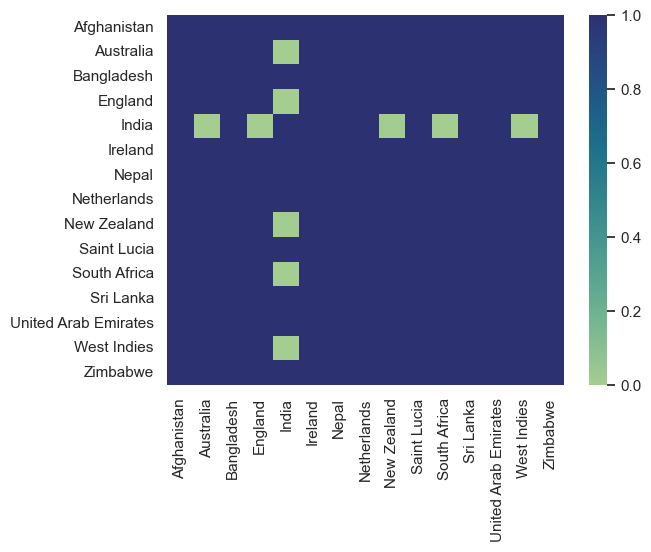

In [42]:
sns.heatmap(data=sp.posthoc_dunn(df, val_col='Winning bid', group_col='Country', p_adjust='bonferroni'), cmap='crest')

In [43]:
kruskal(*[group['Change'].values for _, group in df.groupby('Team')])

KruskalResult(statistic=np.float64(30.338200988175434), pvalue=np.float64(0.0014018730552747142))

<Axes: >

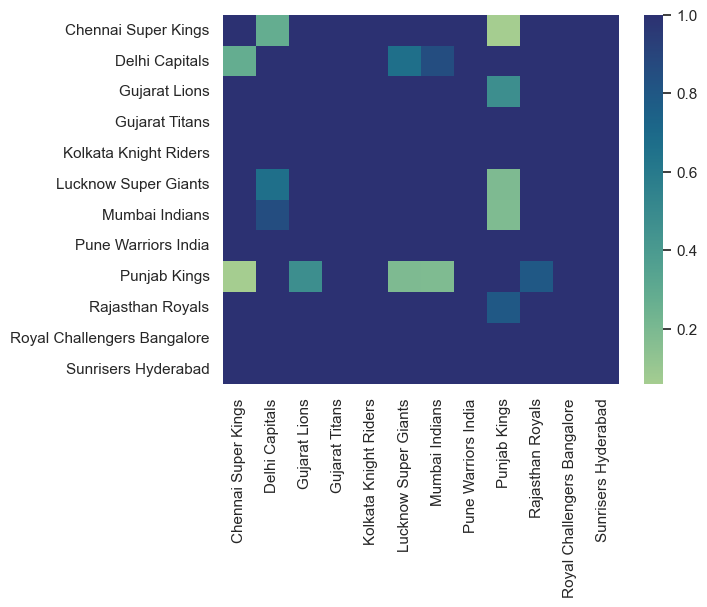

In [44]:
sns.heatmap(data=sp.posthoc_dunn(df, val_col='Change', group_col='Team', p_adjust='bonferroni'), cmap='crest')

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\3630804474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Winning bid', palette="crest")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'India'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'England'),
  Text(4, 0, 'South Africa'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'West Indies'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'United Arab Emirates'),
  Text(9, 0, 'Saint Lucia'),
  Text(10, 0, 'Afghanistan'),
  Text(11, 0, 'Ireland'),
  Text(12, 0, 'Bangladesh'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Nepal')])

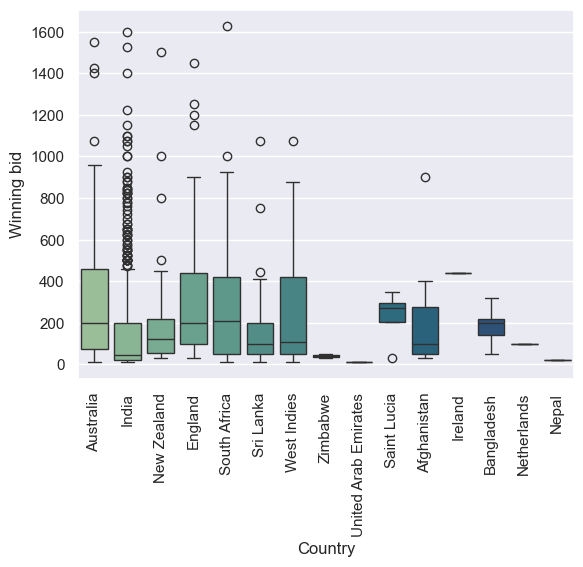

In [45]:
#plt.figure(figsize=(20, 20))
sns.boxplot(data=df, x='Country', y='Winning bid', palette="crest")
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\3044884163.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Winning bid", palette="mako")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Gujarat Lions'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Gujarat Titans'),
  Text(8, 0, 'Pune Warriors India'),
  Text(9, 0, 'Delhi Capitals'),
  Text(10, 0, 'Chennai Super Kings'),
  Text(11, 0, 'Lucknow Super Giants')])

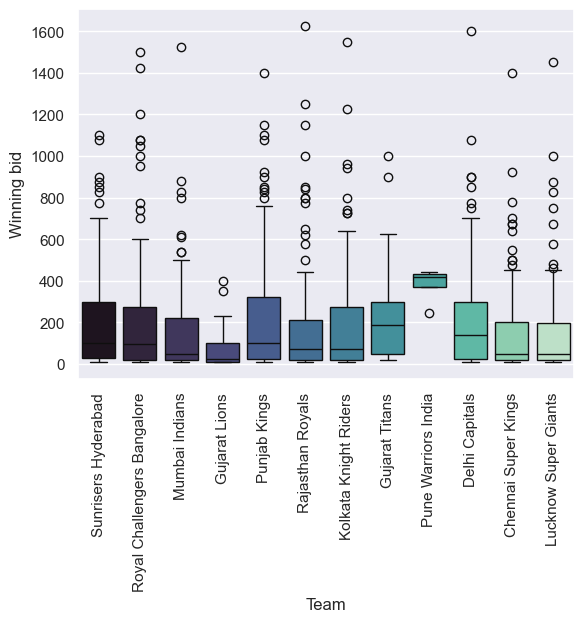

In [46]:
sns.boxplot(data=df, x="Team", y="Winning bid", palette="mako")
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\528127490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_28088\528127490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm")
C:\Users\arham\AppData\Local\Temp\ipykernel_28088\528127490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare")
C:\Users\arham\AppData\Local\Temp\ipykernel_2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Gujarat Lions'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Gujarat Titans'),
  Text(8, 0, 'Pune Warriors India'),
  Text(9, 0, 'Delhi Capitals'),
  Text(10, 0, 'Chennai Super Kings'),
  Text(11, 0, 'Lucknow Super Giants')])

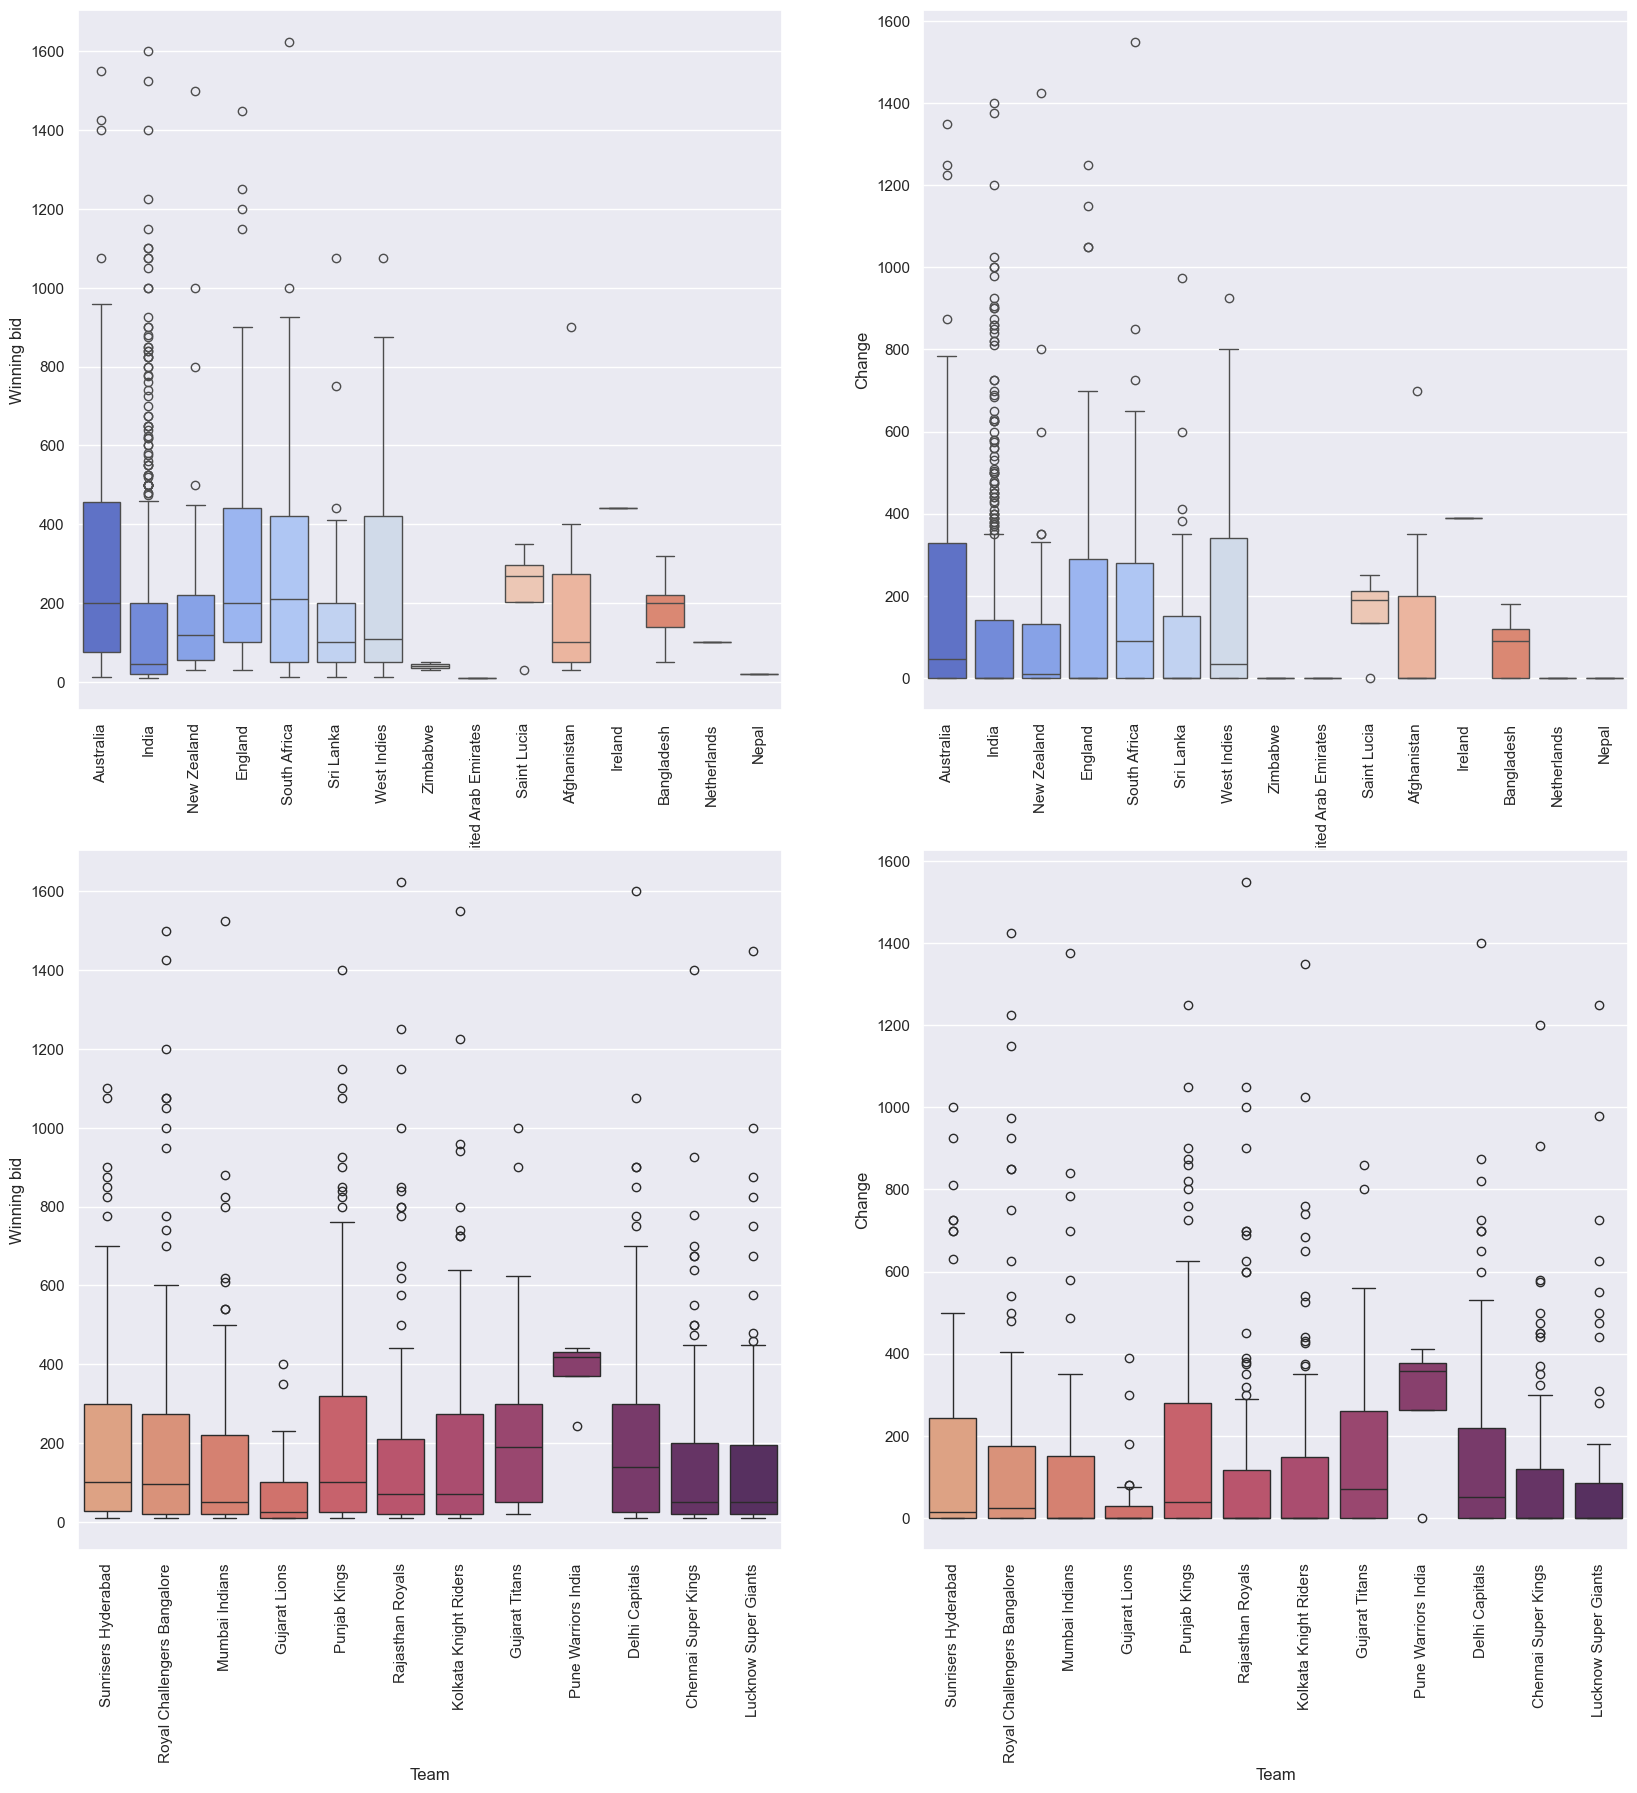

In [47]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm")
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm")
plt.xticks(rotation=90)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare")
plt.xticks(rotation=90)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="Team", y="Change", palette="flare")
plt.xticks(rotation = 90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\1080513428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'India'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'England'),
  Text(4, 0, 'South Africa'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'West Indies'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'United Arab Emirates'),
  Text(9, 0, 'Saint Lucia'),
  Text(10, 0, 'Afghanistan'),
  Text(11, 0, 'Ireland'),
  Text(12, 0, 'Bangladesh'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Nepal')])

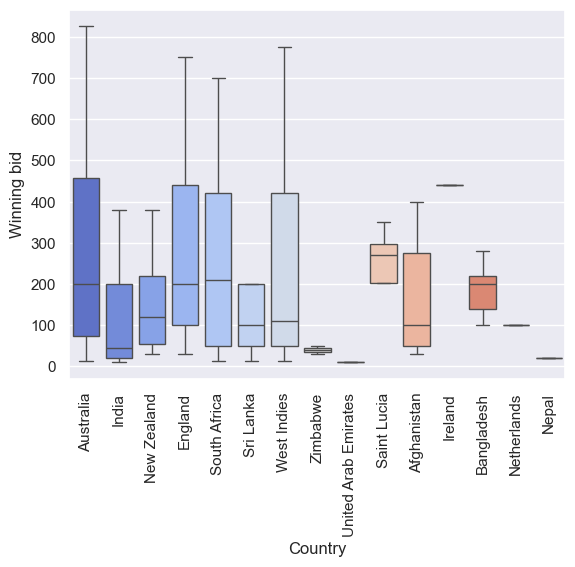

In [48]:
sns.boxplot(data=df, x='Country', y='Winning bid', palette="coolwarm", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\1393295541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'India'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'England'),
  Text(4, 0, 'South Africa'),
  Text(5, 0, 'Sri Lanka'),
  Text(6, 0, 'West Indies'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'United Arab Emirates'),
  Text(9, 0, 'Saint Lucia'),
  Text(10, 0, 'Afghanistan'),
  Text(11, 0, 'Ireland'),
  Text(12, 0, 'Bangladesh'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Nepal')])

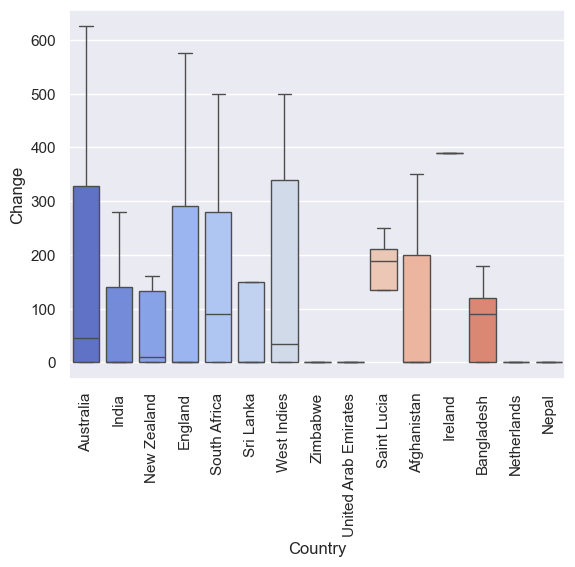

In [49]:
sns.boxplot(data=df, x='Country', y='Change', palette="coolwarm", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\3486245755.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Gujarat Lions'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Gujarat Titans'),
  Text(8, 0, 'Pune Warriors India'),
  Text(9, 0, 'Delhi Capitals'),
  Text(10, 0, 'Chennai Super Kings'),
  Text(11, 0, 'Lucknow Super Giants')])

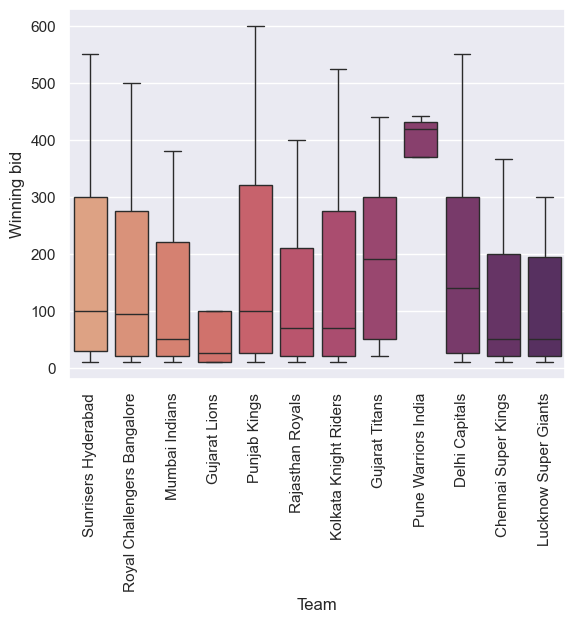

In [50]:
sns.boxplot(data=df, x="Team", y="Winning bid", palette="flare", showfliers=False, whis=1)
plt.xticks(rotation=90)

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\2600030005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Team", y="Change", palette="flare", showfliers=False, whis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Gujarat Lions'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Gujarat Titans'),
  Text(8, 0, 'Pune Warriors India'),
  Text(9, 0, 'Delhi Capitals'),
  Text(10, 0, 'Chennai Super Kings'),
  Text(11, 0, 'Lucknow Super Giants')])

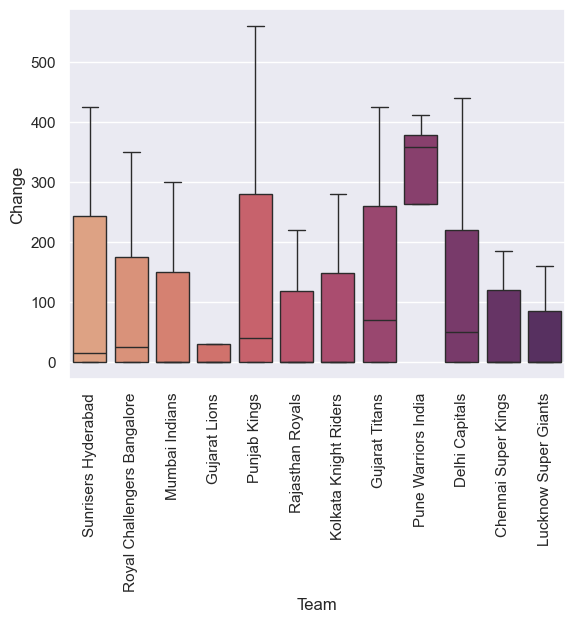

In [51]:
sns.boxplot(data=df, x="Team", y="Change", palette="flare", showfliers=False, whis=1)
plt.xticks(rotation = 90)

# Machine Learning
## K Means Clustering
### Elbow Analysis

In [52]:
scaler = StandardScaler()

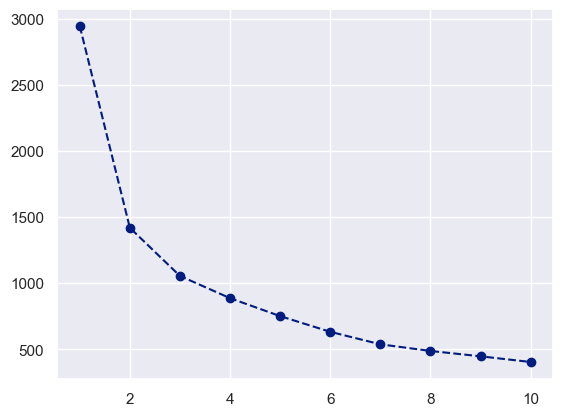

In [53]:
(lambda r: plt.plot(r, (lambda X: [(lambda k: KMeans(n_clusters=k, n_init=10).fit(X).inertia_)(k) for k in r])(scaler.fit_transform(player_df[['Num_of_Teams', 'Base_Price_High', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta']])), marker="o", linestyle="--"))(range(1,11))

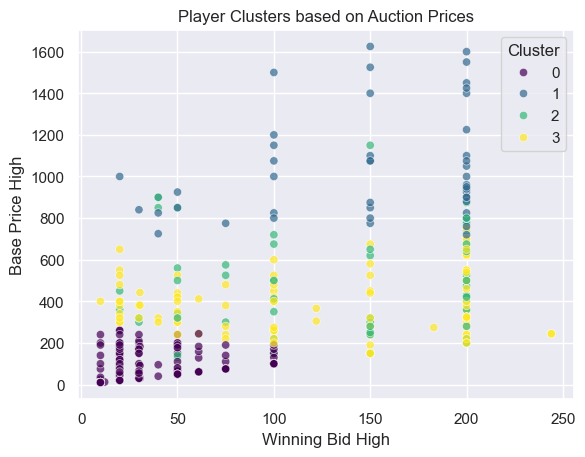

In [54]:
X = scaler.fit_transform(player_df[['Num_of_Teams', 'Base_Price_High', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta']])
kmeans = KMeans(n_clusters=4, n_init=10)
player_df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(y=player_df['Winning_Bid_High'], 
                x=player_df['Base_Price_High'], 
                hue=player_df['Cluster'], 
                palette='viridis', 
                alpha=0.7)

plt.xlabel('Winning Bid High')
plt.ylabel('Base Price High')
plt.title('Player Clusters based on Auction Prices')
plt.legend(title="Cluster")
plt.show()

In [55]:
print(sklearn.metrics.silhouette_score(X, kmeans.labels_))

0.5057951050836058


## Dendogram

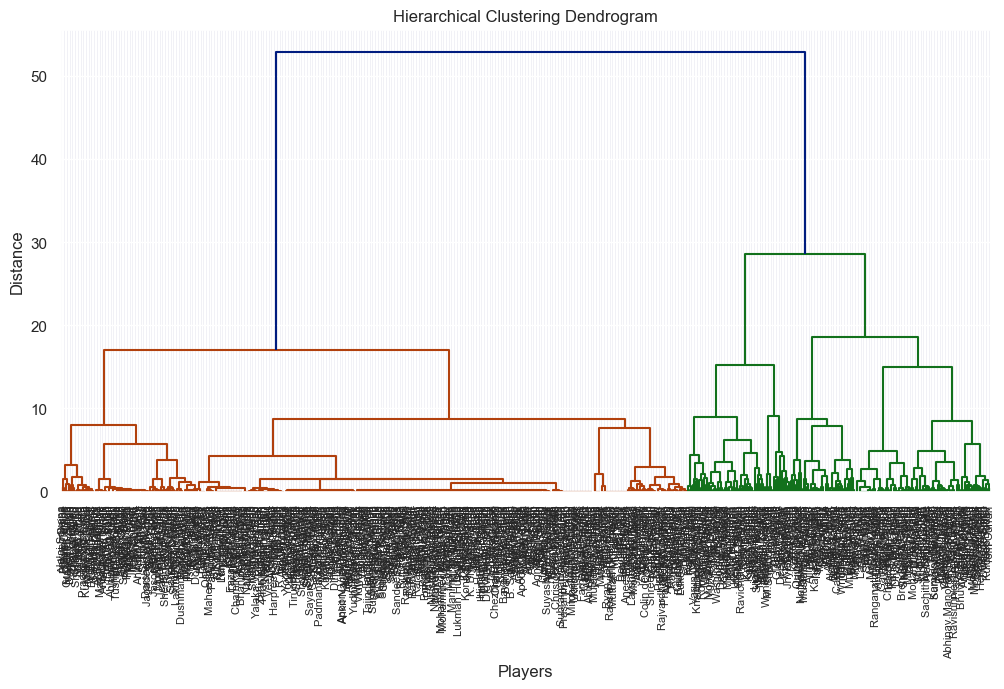

In [56]:
plt.figure(figsize=(12, 6))
X = scaler.fit_transform(player_df[['Base_Price_High', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta', 'Num_of_Teams']])
linked = linkage(X, method='ward')  # idk wtf ward is
dendrogram(linked, labels=player_df['Player'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Players")
plt.ylabel("Distance")
plt.show()

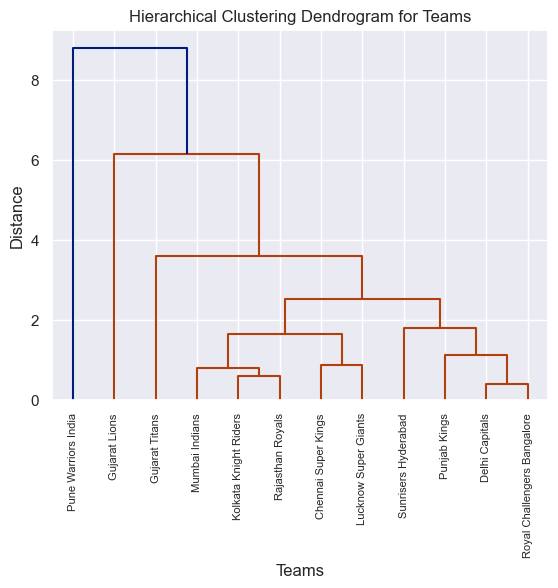

In [57]:

team_features = ['Num_of_Players', 'Winning_Bid_High', 'Winning_Bid_Mean', 
                 'Winning_Bid_Low', 'Largest_Delta', 'Mean_Delta']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(team_df[team_features])

linked = linkage(X_scaled, method='ward') 

dendrogram(linked, labels=team_df['Team'].values, leaf_rotation=90, leaf_font_size=8)

plt.title("Hierarchical Clustering Dendrogram for Teams")
plt.xlabel("Teams")
plt.ylabel("Distance")
plt.show()

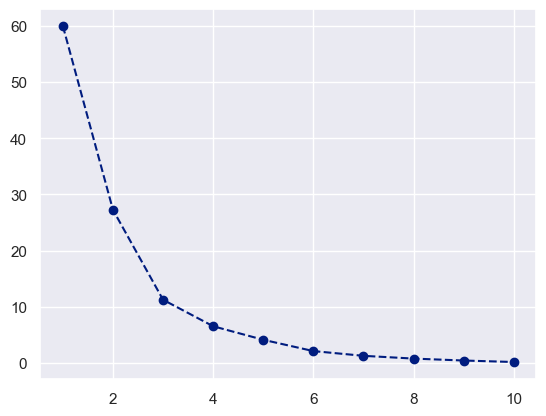

In [58]:
(lambda r: plt.plot(r, (lambda X: [(lambda k: KMeans(n_clusters=k, n_init=10).fit(X).inertia_)(k) for k in r])(scaler.fit_transform(team_df[['Num_of_Players','Winning_Bid_Low', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta']])), marker="o", linestyle="--"))(range(1,11))

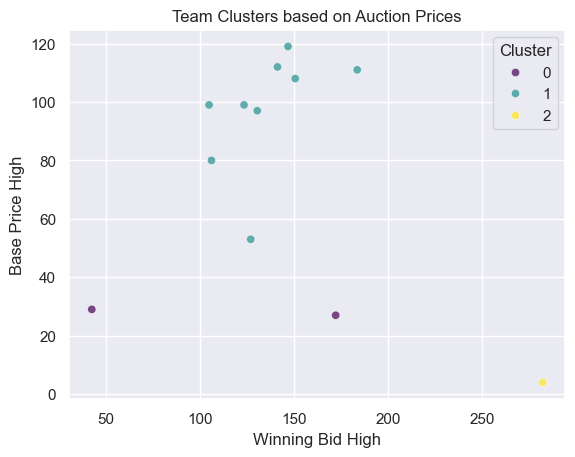

In [59]:
X = scaler.fit_transform(team_df[['Num_of_Players','Winning_Bid_Low', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta']])
kmeans = KMeans(n_clusters=3, n_init=10)
team_df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(y=team_df['Num_of_Players'], 
                x=team_df['Mean_Delta'], 
                hue=team_df['Cluster'], 
                palette='viridis', 
                alpha=0.7)

plt.xlabel('Winning Bid High')
plt.ylabel('Base Price High')
plt.title('Team Clusters based on Auction Prices')
plt.legend(title="Cluster")
plt.show()

In [60]:
print(sklearn.metrics.silhouette_score(X, kmeans.labels_))

0.504594687736806


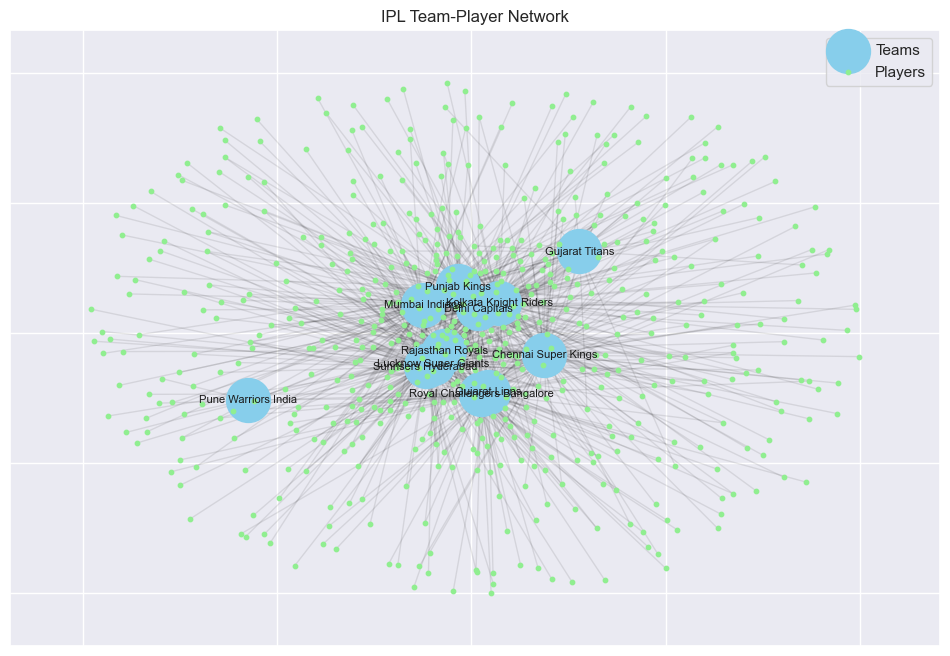

In [61]:
G = nx.Graph()

teams = team_df['Team'].unique()
players = player_df['Player'].unique()

G.add_nodes_from(teams, bipartite = 0)
G.add_nodes_from(players, bipartite = 1)

for _, row in df.iterrows():
    G.add_edge(row['Team'], row['Player'], weight=row['Winning bid'])

pos = nx.spring_layout(G, seed=42, k=0.9)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color="skyblue", nodelist=teams, node_size=1000, label="Teams")
nx.draw_networkx_nodes(G, pos, node_color="lightgreen", nodelist=players, node_size=10, label="Players")

edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw_networkx_labels(G, pos, labels={team: team for team in teams},font_size=8)

plt.title("IPL Team-Player Network")
plt.legend()
plt.show()

## PCA

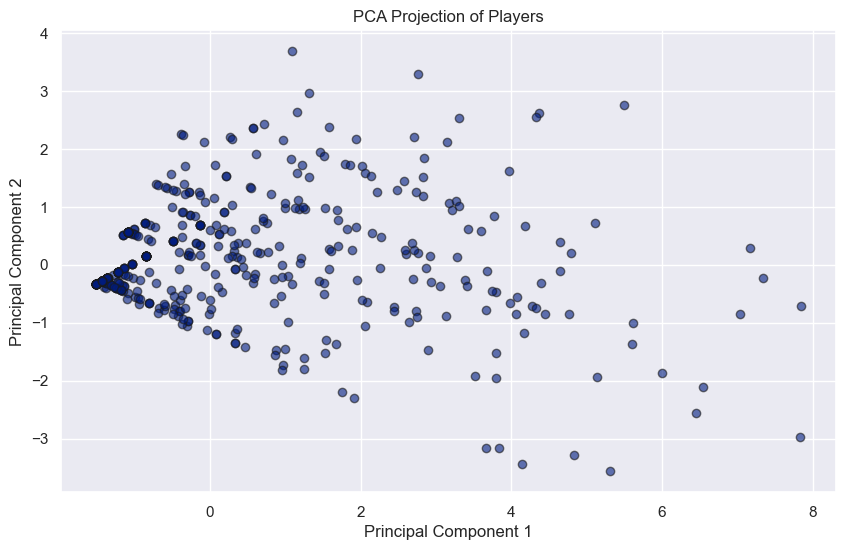

In [62]:
features = ['Base_Price_High', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta', 'Num_of_Teams']
X = player_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Player'] = player_df['Player'] 

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Players')
plt.show()

### PCA + KMeans

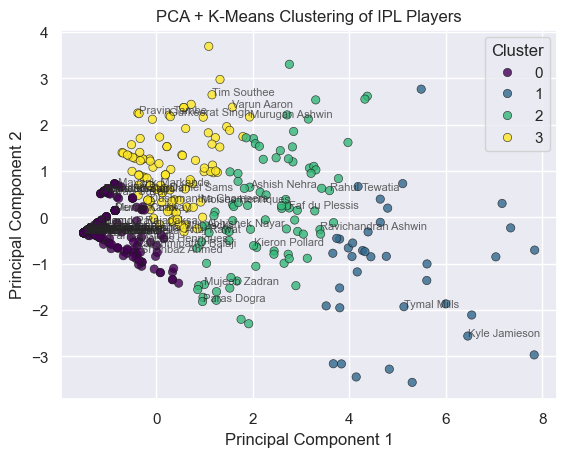

In [63]:
features = ['Base_Price_High', 'Winning_Bid_High', 'Largest_Delta', 'Mean_Delta', 'Num_of_Teams']
X = player_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
player_clusters = kmeans.fit_predict(X_pca)  

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Player'] = player_df['Player']
pca_df['Cluster'] = player_clusters  

#plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', alpha=0.8, edgecolor='k')


for i, player in enumerate(pca_df['Player']):
    if np.random.rand() < 0.1:  
        plt.annotate(player, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering of IPL Players')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [64]:
sklearn.metrics.silhouette_score(X_pca, player_clusters)

np.float64(0.5421849964687155)

## Random Forest

In [65]:
features = ['Base_Price_High', 'Num_of_Teams', 'Largest_Delta', 'Mean_Delta']
target = 'Winning_Bid_Mean'

X = player_df[features]
y = player_df[target]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print(r2, rmse)

0.9888611240805879 17.935098447672917


## Linear & Polynomial Regression

Linear R² Score: 0.9928
Linear RMSE: 14.39


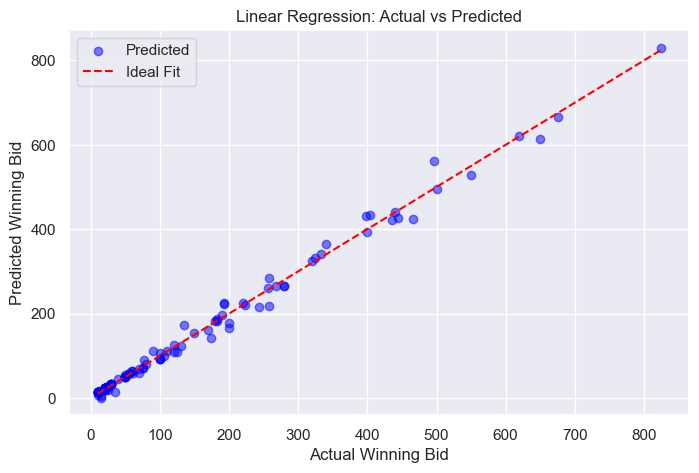

In [66]:
features = ['Base_Price_High', 'Num_of_Teams', 'Largest_Delta', 'Mean_Delta', 'Year_Range']
target = 'Winning_Bid_Mean'

X = player_df[features]
y = player_df[target]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

r2_linear = sklearn.metrics.r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_linear))

print(f"Linear R² Score: {r2_linear:.4f}")
print(f"Linear RMSE: {rmse_linear:.2f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Winning Bid")
plt.ylabel("Predicted Winning Bid")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

Polynomial R² Score: 0.9936
Polynomial RMSE: 13.57


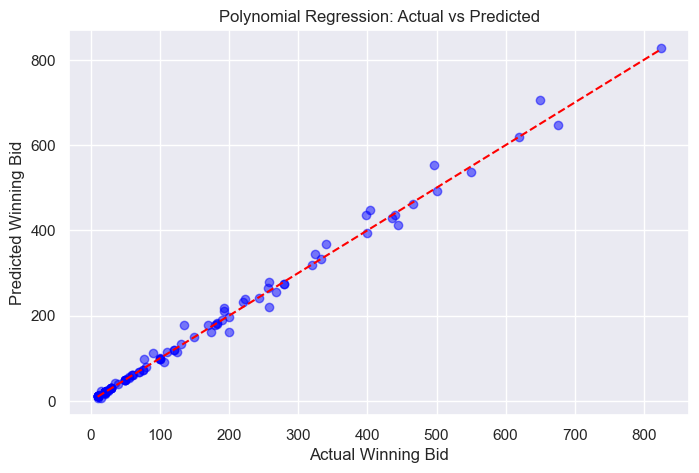

In [67]:
features = ['Base_Price_High', 'Num_of_Teams', 'Largest_Delta', 'Mean_Delta', 'Year_Range']
target = 'Winning_Bid_Mean'

X = player_df[features]
y = player_df[target]

poly = sklearn.preprocessing.PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print(f"Polynomial R² Score: {r2:.4f}")
print(f"Polynomial RMSE: {rmse:.2f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Winning Bid")
plt.ylabel("Predicted Winning Bid")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

In [68]:
multitrade_df = (lambda _df: df[df['Player'].isin(_df[_df > 1].index)])(df['Player'].value_counts())
multitrade_df


,Country,Player,Team,Base price,Winning bid,Year,Change,Rel Change
53,Australia,Aaron Finch,Sunrisers Hyderabad,100.0,400.0,2014,300.0,3.000000
650,Australia,Aaron Finch,Royal Challengers Bangalore,100.0,440.0,2020,340.0,3.400000
222,Australia,Aaron Finch,Mumbai Indians,100.0,320.0,2015,220.0,2.200000
307,Australia,Aaron Finch,Gujarat Lions,100.0,100.0,2016,0.0,0.000000
434,Australia,Aaron Finch,Punjab Kings,150.0,620.0,2018,470.0,3.133333
...,...,...,...,...,...,...,...,...
158,India,Yuzvendra Chahal,Royal Challengers Bangalore,10.0,10.0,2014,0.0,0.000000
805,India,Yuzvendra Chahal,Rajasthan Royals,200.0,650.0,2022,450.0,2.250000
466,India,Yuzvendra Chahal,Royal Challengers Bangalore,200.0,600.0,2018,400.0,2.000000
48,India,Zaheer Khan,Mumbai Indians,100.0,260.0,2014,160.0,1.600000


In [69]:
def avg_trade_gap(player_data):
    years = sorted(player_data['Year'].unique())
    if len(years) > 1:
        gaps = np.diff(years)
        return np.mean(gaps)
    return None

avg_trade_gaps = df.groupby('Player').apply(avg_trade_gap).dropna()
avg_trade_gaps.describe()

C:\Users\arham\AppData\Local\Temp\ipykernel_28088\468993076.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_trade_gaps = df.groupby('Player').apply(avg_trade_gap).dropna()


count    256.000000
mean       2.596007
std        1.409706
min        1.000000
25%        1.500000
50%        2.333333
75%        3.500000
max        8.000000
dtype: float64

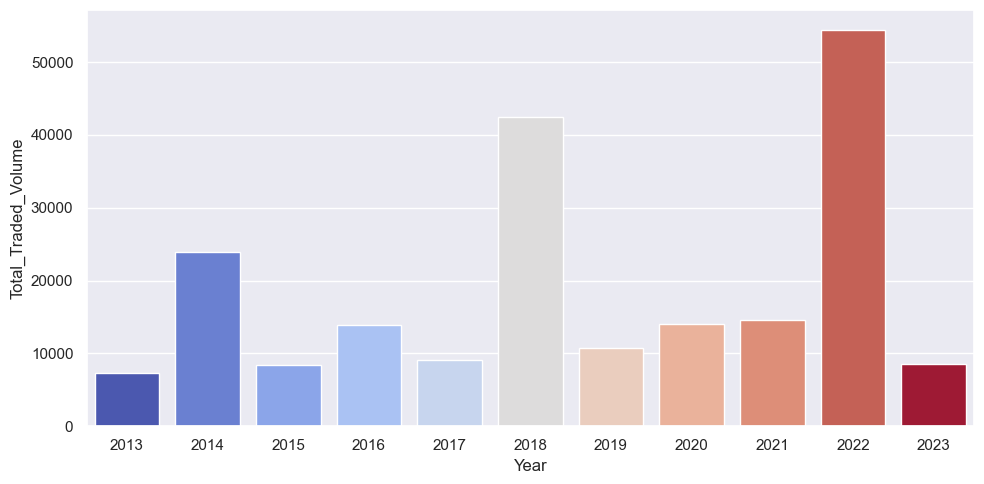

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Total_Traded_Volume", data=yearly_df, palette="coolwarm", hue="Year").legend_.remove()
plt.tight_layout()


plt.show();